In [4]:
# Jiayin Huo 1005708370
# Instructor: Professor Shion Guha
# Course code: INF2178
# Course name: Experimental Design for Data Science
# Program: MI
# Faculty of Information
# University of Toronto

# Technical Assignment 1
from google.colab import drive
drive.mount('/drive', force_remount=True)

import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# import dataset
df = pd.read_excel('/content/sample_data/INF2178_A1_data (1).xlsx')
df['Month'] = df['OCCUPANCY_DATE'].dt.month
# Remove specific  columns
df = df.drop(['PROGRAM_ID', 'PROGRAM_NAME', 'ORGANIZATION_NAME', 'OCCUPANCY_DATE'], axis=1)
df['PROGRAM_MODEL'].fillna('Emergency', inplace=True)
df['OVERNIGHT_SERVICE_TYPE'].fillna('Shelter', inplace=True)
df['PROGRAM_AREA'].fillna('Base Shelter and Overnight Services System', inplace=True)

Mounted at /drive


In [6]:
# Obtain the unique values in the 'OVERNIGHT_SERVICE_TYPE' column of the DataFrame
df['OVERNIGHT_SERVICE_TYPE'].unique()

array(['Motel/Hotel Shelter', 'Shelter', 'Interim Housing',
       'Isolation/Recovery Site', '24-Hour Respite Site',
       'Warming Centre', "24-Hour Women's Drop-in"], dtype=object)

In [7]:
# Define a mapping dictionary to map specific values in the 'PROGRAM_AREA' column to new values
mapping_dict = {
    'COVID-19 Response': 'COVID-19',
    'Base Shelter and Overnight Services System': 'Base Shelter',
    'Temporary Refugee Response': 'Tem Refugee',
    'Winter Programs': 'Winter Programs'
    # Add other mapping relationships
}
# Map a specific column
df['PROGRAM_AREA'] = df['PROGRAM_AREA'].map(mapping_dict)


In [8]:
# Define a mapping dictionary to map specific values in the 'OVERNIGHT_SERVICE_TYPE' column to new values
mapping_dict = {
    'Motel/Hotel Shelter': 'Motel/Hotel',
    'Shelter': 'Shelter',
    'Isolation/Recovery Site': 'Isolation/Recovery',
    '24-Hour Respite Site': 'Respite Site',
    'Warming Centre': 'Warming Centre',
    "24-Hour Women's Drop-in": "Women Drop-in",
    'Interim Housing': 'Interim Housing'
    # Add other mapping relationships
}
# Map a specific column
df['OVERNIGHT_SERVICE_TYPE'] = df['OVERNIGHT_SERVICE_TYPE'].map(mapping_dict)


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SECTOR                  50944 non-null  object 
 1   PROGRAM_MODEL           50944 non-null  object 
 2   OVERNIGHT_SERVICE_TYPE  50944 non-null  object 
 3   PROGRAM_AREA            50944 non-null  object 
 4   SERVICE_USER_COUNT      50944 non-null  int64  
 5   CAPACITY_TYPE           50944 non-null  object 
 6   CAPACITY_ACTUAL_BED     32399 non-null  float64
 7   OCCUPIED_BEDS           32399 non-null  float64
 8   CAPACITY_ACTUAL_ROOM    18545 non-null  float64
 9   OCCUPIED_ROOMS          18545 non-null  float64
 10  Month                   50944 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 4.3+ MB


In [10]:
# Assume df is DataFrame
unique_elements = df.nunique()
print(unique_elements)

SECTOR                      5
PROGRAM_MODEL               2
OVERNIGHT_SERVICE_TYPE      7
PROGRAM_AREA                4
SERVICE_USER_COUNT        331
CAPACITY_TYPE               2
CAPACITY_ACTUAL_BED       173
OCCUPIED_BEDS             191
CAPACITY_ACTUAL_ROOM      221
OCCUPIED_ROOMS            248
Month                      12
dtype: int64


In [11]:
df.head()

,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,Month
0,Families,Emergency,Motel/Hotel,COVID-19,74,Room Based Capacity,NaN,NaN,29.0,26.0,1
1,Mixed Adult,Emergency,Motel/Hotel,COVID-19,3,Room Based Capacity,NaN,NaN,3.0,3.0,1
2,Men,Emergency,Motel/Hotel,COVID-19,24,Room Based Capacity,NaN,NaN,28.0,23.0,1
3,Mixed Adult,Emergency,Motel/Hotel,COVID-19,25,Room Based Capacity,NaN,NaN,17.0,17.0,1
4,Women,Emergency,Motel/Hotel,COVID-19,13,Room Based Capacity,NaN,NaN,14.0,13.0,1


In [12]:
# Divide into two subsets based on the different values ​​of the CAPACITY_TYPE column.
bed_based_df = df[df['CAPACITY_TYPE'] == 'Bed Based Capacity']
bed_based_df= bed_based_df.drop(['CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS'], axis=1)


room_based_df = df[df['CAPACITY_TYPE'] == 'Room Based Capacity']
room_based_df= room_based_df.drop(['CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS'], axis=1)

In [13]:
bed_based_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32399 entries, 5 to 50943
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SECTOR                  32399 non-null  object 
 1   PROGRAM_MODEL           32399 non-null  object 
 2   OVERNIGHT_SERVICE_TYPE  32399 non-null  object 
 3   PROGRAM_AREA            32399 non-null  object 
 4   SERVICE_USER_COUNT      32399 non-null  int64  
 5   CAPACITY_TYPE           32399 non-null  object 
 6   CAPACITY_ACTUAL_BED     32399 non-null  float64
 7   OCCUPIED_BEDS           32399 non-null  float64
 8   Month                   32399 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.5+ MB


['Mixed Adult' 'Men' 'Families' 'Women' 'Youth']
T-statistic: -24.76501651644496
P-value: 1.0008338084600106e-132
There is statistically significant difference.


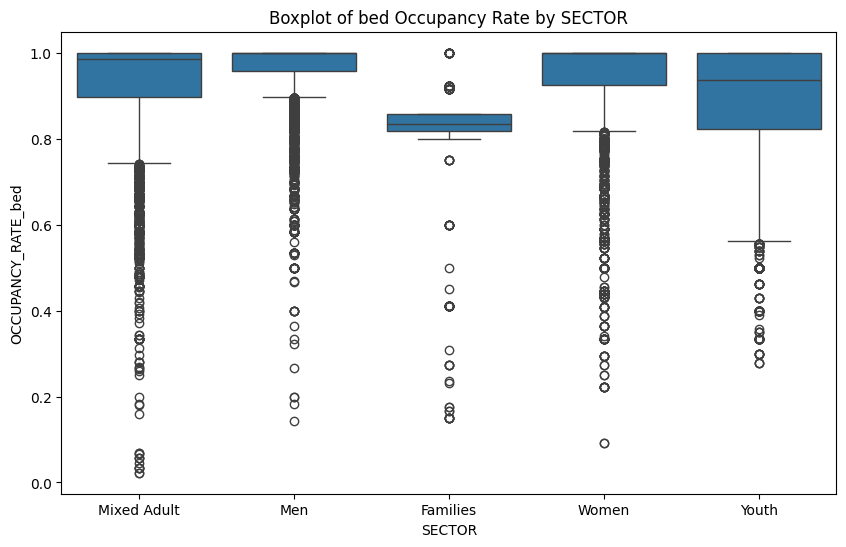

['Families' 'Mixed Adult' 'Men' 'Women' 'Youth']
T-statistic: 9.17540822190609
P-value: 5.3308370032743536e-20
There is statistically significant difference.


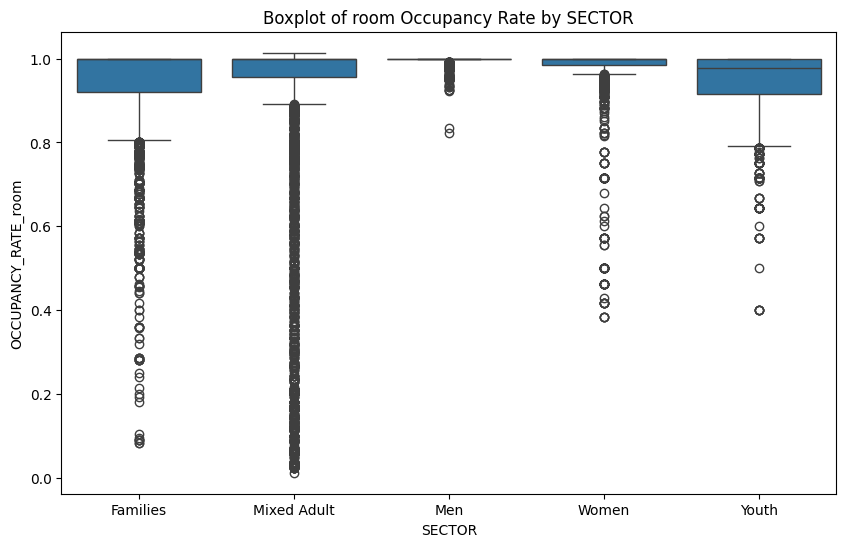

In [15]:
# Calculate the occupancy rate of beds
bed_based_df['OCCUPANCY_RATE'] = bed_based_df['OCCUPIED_BEDS'] / bed_based_df['CAPACITY_ACTUAL_BED']
# Calculate the occupancy rate of rooms
room_based_df['OCCUPANCY_RATE'] = room_based_df['OCCUPIED_ROOMS'] / room_based_df['CAPACITY_ACTUAL_ROOM']


def get_ttest(df, column, name):
    # Choose two departments for comparison, which can be changed based on the categorical variable you select
    target = df[column].unique()
    print(target)
    sector1 = df[df[column] == target[0]]['OCCUPANCY_RATE']
    sector2 = df[df[column] == target[1]]['OCCUPANCY_RATE']


    # Conduct t test
    t_stat, p_value = ttest_ind(sector1, sector2, equal_var=False)

    # Show result
    print(f'T-statistic: {t_stat}')
    print(f'P-value: {p_value}')

    # Explain based on the result of t test
    if p_value < 0.05:
        print("There is statistically significant difference.")
    else:
        print("There is no statistically significant difference.")
 # Create box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='OCCUPANCY_RATE', data=df)

    # Add title and lable
    plt.title('Boxplot of '+ name + ' Occupancy Rate by '+column)
    plt.xlabel(column)
    plt.ylabel('OCCUPANCY_RATE_'+name)

    # Show plot graph
    plt.show()


get_ttest(bed_based_df, 'SECTOR', 'bed')
get_ttest(room_based_df, 'SECTOR', 'room')

['Emergency' 'Transitional']
T-statistic: 36.77467476249541
P-value: 1.0223078978215681e-282
There is statistically significant difference.


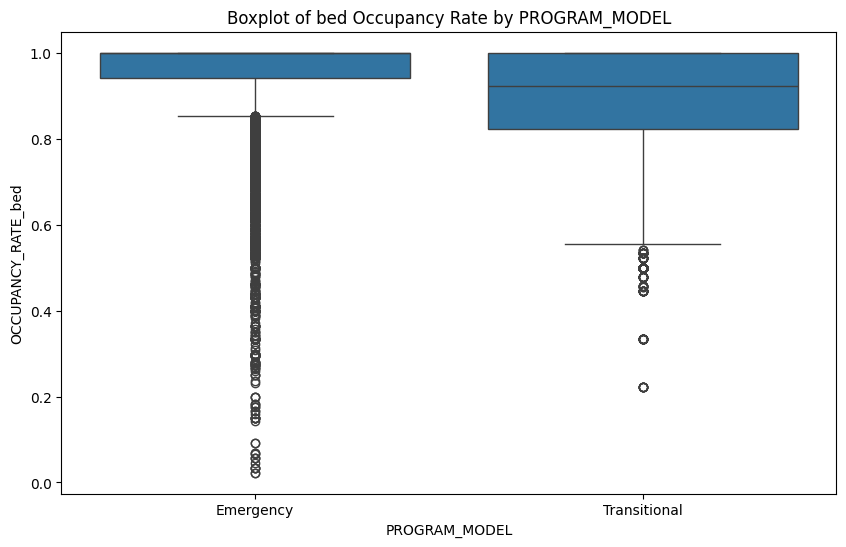

['Emergency' 'Transitional']
T-statistic: 31.71080126309493
P-value: 4.4252019739840735e-150
There is statistically significant difference.


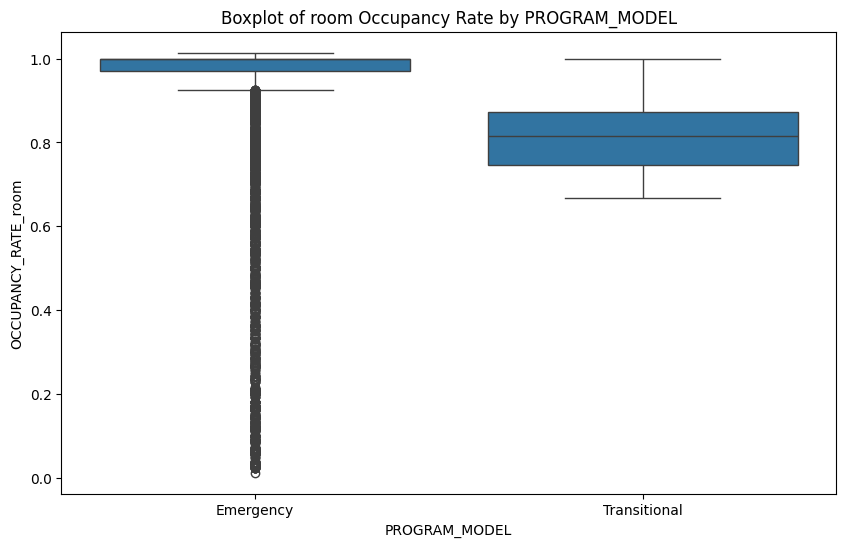

In [16]:
get_ttest(bed_based_df, 'PROGRAM_MODEL', 'bed')
get_ttest(room_based_df, 'PROGRAM_MODEL', 'room')

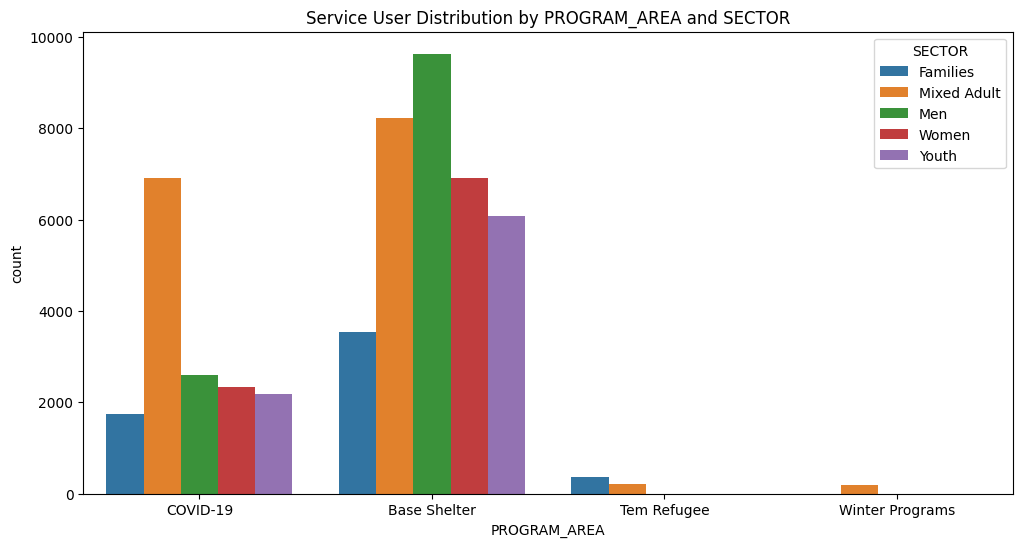

In [17]:
# The distribution of service users and its relationship with regions
plt.figure(figsize=(12, 6))
sns.countplot(x='PROGRAM_AREA', data=df, hue='SECTOR')
plt.title('Service User Distribution by PROGRAM_AREA and SECTOR')
plt.show()

<Figure size 1600x800 with 0 Axes>

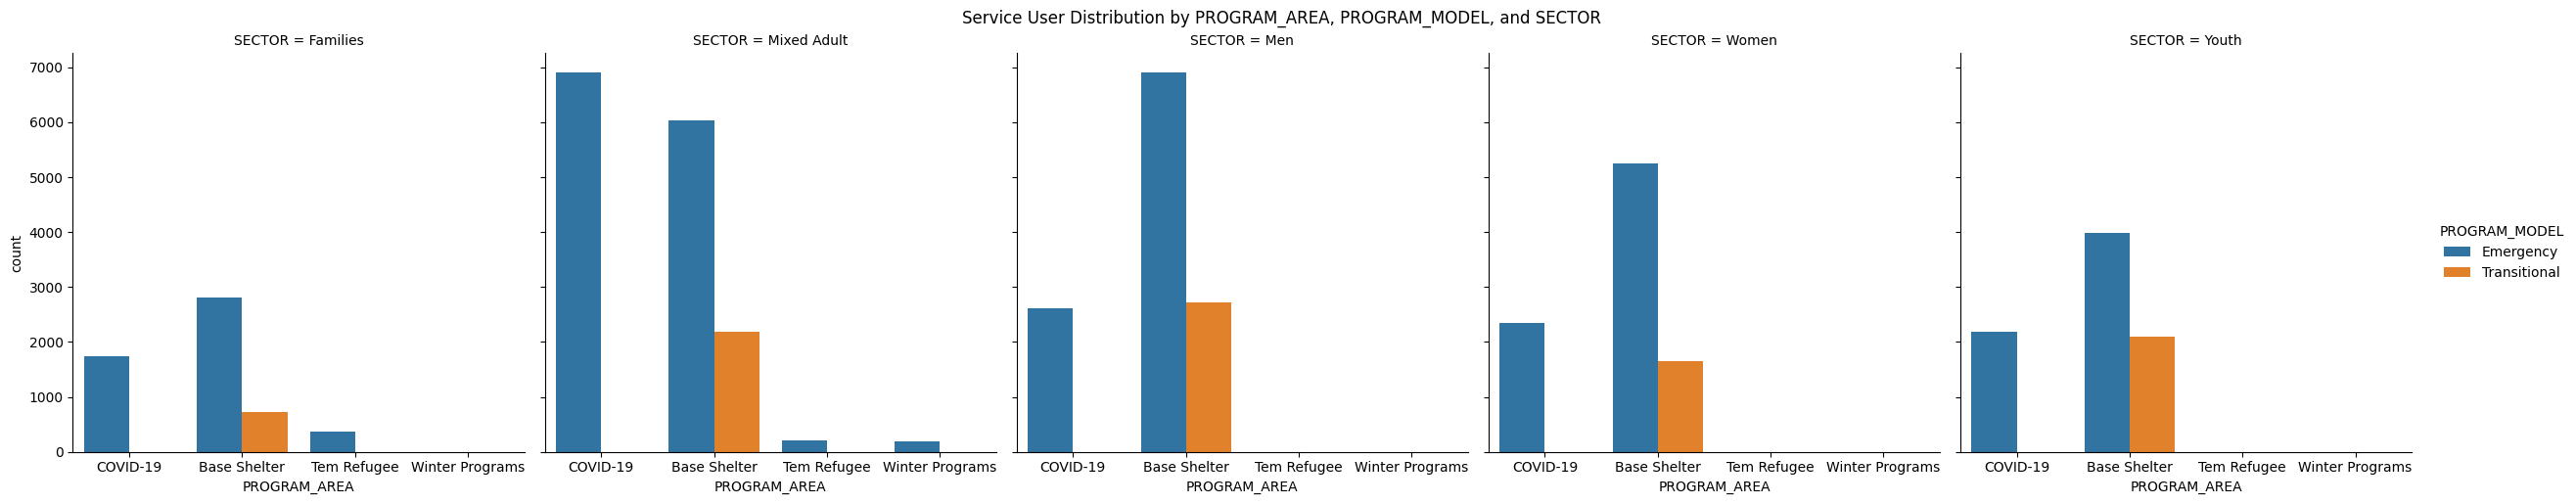

In [18]:
# Distribution of service users across different regions, shelter types, and modes
plt.figure(figsize=(16, 8))
sns.catplot(x='PROGRAM_AREA', hue='PROGRAM_MODEL', col='SECTOR', kind='count', data=df)
plt.suptitle('Service User Distribution by PROGRAM_AREA, PROGRAM_MODEL, and SECTOR', y=1.02)
plt.show()

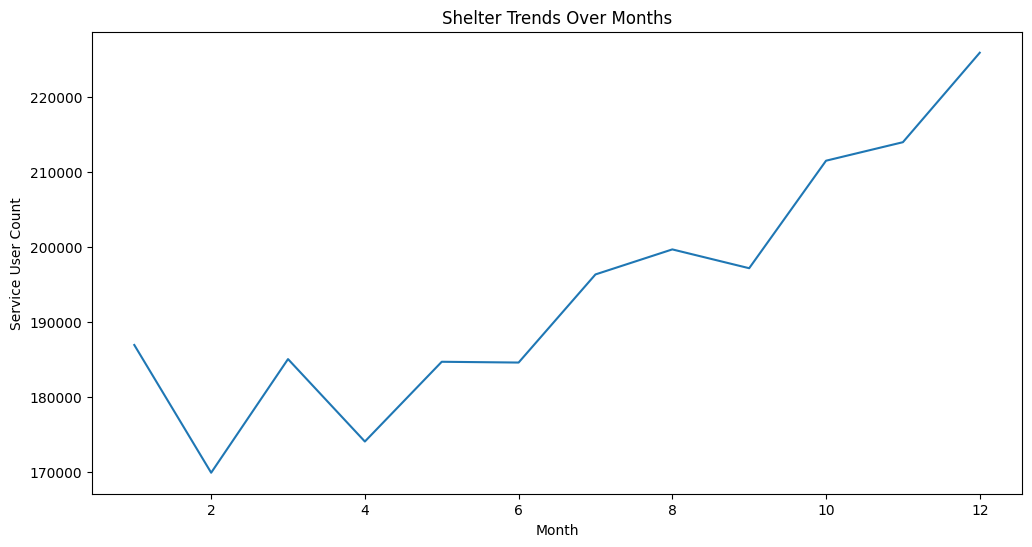

In [19]:
# Generate a shelter occupancy trend graph
# Aggregate data for each month
monthly_aggregated = df.groupby('Month')['SERVICE_USER_COUNT'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='SERVICE_USER_COUNT', data=monthly_aggregated , errorbar=None)
plt.title('Shelter Trends Over Months')
plt.xlabel('Month')
plt.ylabel('Service User Count')
plt.show()

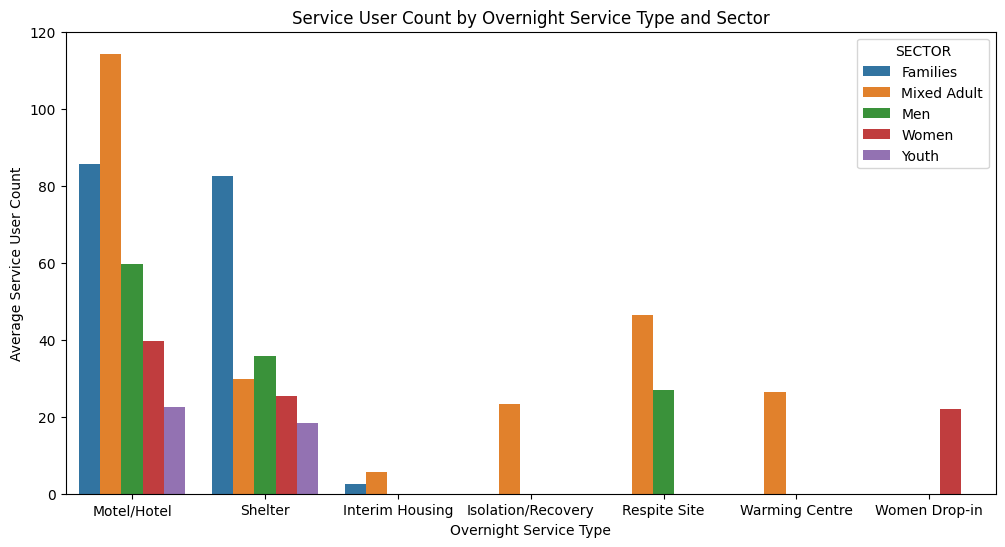

In [20]:
plt.figure(figsize=(12, 6))
# Create a bar plot showing the average service user count based on overnight service type and sector
sns.barplot(x='OVERNIGHT_SERVICE_TYPE', y='SERVICE_USER_COUNT', hue='SECTOR', data=df, errorbar=('ci', False))
plt.title('Service User Count by Overnight Service Type and Sector')
plt.xlabel('Overnight Service Type')
plt.ylabel('Average Service User Count')
#plt.xticks(rotation=45, ha='right')
plt.show()

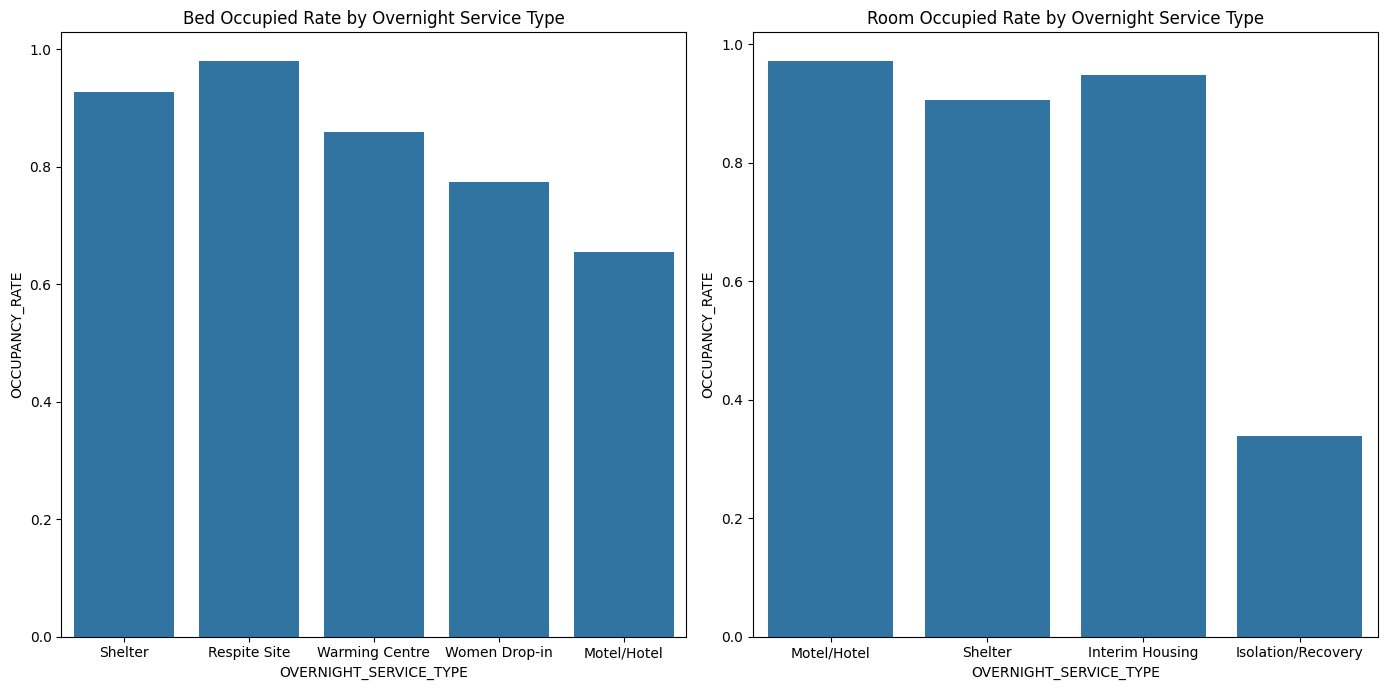

In [22]:
plt.figure(figsize=(14, 7))

# First subplot: df1
plt.subplot(1, 2, 1)
sns.barplot(x='OVERNIGHT_SERVICE_TYPE', y='OCCUPANCY_RATE', data=bed_based_df, errorbar=('ci', False))
plt.title('Bed Occupied Rate by Overnight Service Type')

# Second subplot: df2
plt.subplot(1, 2, 2)
sns.barplot(x='OVERNIGHT_SERVICE_TYPE', y='OCCUPANCY_RATE', data=room_based_df, errorbar=('ci', False))
plt.title('Room Occupied Rate by Overnight Service Type')

# Adjust layout
plt.tight_layout()

plt.show()